# Basic Descriptors - CB1 ligands

In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


RDKit WARNING: [10:08:06] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
#Load data
df_can = pd.read_csv('cannabinoid.csv', delimiter=';')

In [3]:
#Clean data
df1 = df_can.dropna(subset=['Smiles'])

In [4]:
#List of molecules isntances
ligandm_database = []
for ligand in df1["Smiles"]:
		ligandm_database.append(Chem.MolFromSmiles(ligand))

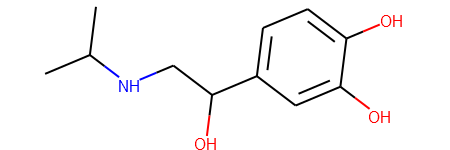

In [5]:
#Molecule
ligandm_database[12]

In [6]:
# Number of rings:
Chem.GetSSSR(ligandm_database[12])

1

In [7]:
# Number of rotatable bonds:
Chem.CalcNumRotatableBonds(ligandm_database[12])

4

In [8]:
# Number of all heavy/non-hydrogen atoms
ligandm_database[12].GetNumHeavyAtoms()

15

In [9]:
# number of hydrogen bond acceptors / donors
from rdkit.Chem import rdMolDescriptors as rdescriptors
rdescriptors.CalcNumLipinskiHBA(ligandm_database[12]), rdescriptors.CalcNumLipinskiHBD(ligandm_database[12])

(4, 4)

In [10]:
# molecular weight
rdescriptors.CalcExactMolWt(ligandm_database[12])

211.120843404

In [11]:
# topological polar surface area
rdescriptors.CalcTPSA(ligandm_database[12])

72.72

In [12]:
# octanol-water partition coefficient
Descriptors.MolLogP(ligandm_database[12])

1.1291999999999998

In [13]:
#List of molecule rings
ligandm_rings = []
for x in ligandm_database:
		ligandm_rings.append(Chem.GetSSSR(x))
#List of rotable bonds
ligandm_rot = []
for x in ligandm_database:
		ligandm_rot.append(Chem.CalcNumRotatableBonds(x))
#List of  number of heavy atoms
ligandm_ha = []
for x in ligandm_database:
		ligandm_ha.append(x.GetNumHeavyAtoms())

#List of  number of number of hydrogen bond acceptors
ligandm_hba = []
for x in ligandm_database:
		ligandm_hba.append(rdescriptors.CalcNumLipinskiHBA(x))
        
# List of number of hydrogen bond donors   
ligandm_hbd = []
for x in ligandm_database:
		ligandm_hbd.append(rdescriptors.CalcNumLipinskiHBD(x))

# List of molecular weight
ligandm_mw = []
for x in ligandm_database:
		ligandm_mw.append(rdescriptors.CalcExactMolWt(x))

# List of molecular topological polar surface area
ligandm_tpsa = []
for x in ligandm_database:
		ligandm_tpsa.append(rdescriptors.CalcTPSA(x))
        
# List of molecular octanol-water partition coefficient
ligandm_ow = []
for x in ligandm_database:
		ligandm_ow.append(Descriptors.MolLogP(x))



In [14]:
#CB1 ligands dataframe
df = pd.DataFrame(data={'rings': ligandm_rings,
                        'rotatable': ligandm_rot, 'atoms': ligandm_ha,
                        'hba': ligandm_hba, 'hbd': ligandm_hbd, 'molwt': ligandm_mw,
                        'tpsa': ligandm_tpsa, 'logp': ligandm_ow})
print(df.loc[[12]])

    rings  rotatable  atoms  hba  hbd       molwt   tpsa    logp
12      1          4     15    4    4  211.120843  72.72  1.1292


<AxesSubplot:>

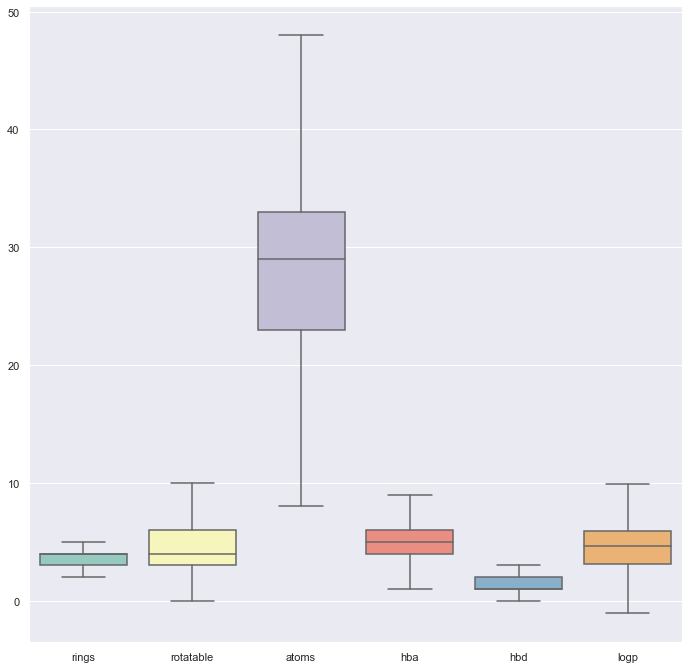

In [15]:
#Boxplot CB1 ligands without molecular weight and topological polar surface area
sns.set(rc={'figure.figsize':(11.7, 11.7)})
sns.boxplot(data=df[['rings', 'rotatable', 'atoms', 'hba', 'hbd', 'logp']],
            palette = "Set3", 
            showfliers=False)

<AxesSubplot:>

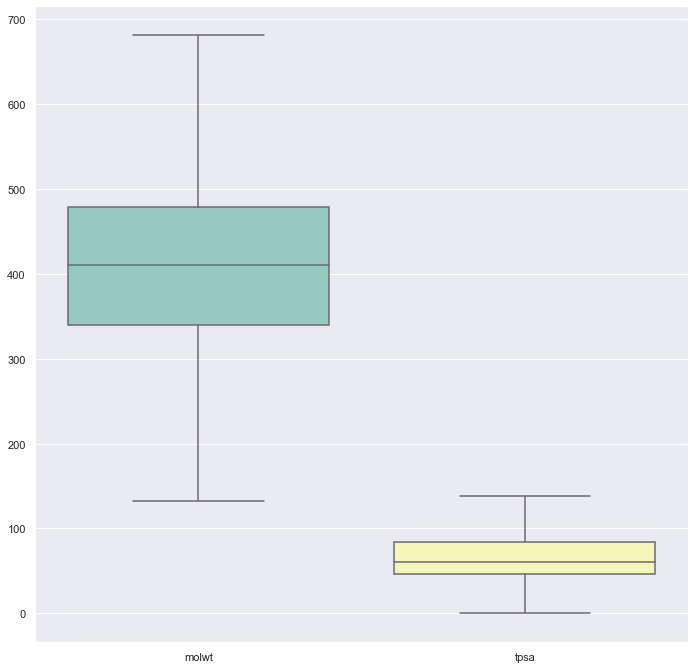

In [16]:
#Boxplot CB1 ligands
sns.set(rc={'figure.figsize':(11.7, 11.7)})
sns.boxplot(data=df[['molwt', 'tpsa']], 
            palette = "Set3", 
            showfliers = False)

In [17]:
#Load drugbank data
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]
len(drugs)

7113

In [18]:
#List of molecule rings
db_rings = []
for x in drugs:
		db_rings.append(Chem.GetSSSR(x))
#List of rotable bonds
db_rot = []
for x in drugs:
		db_rot.append(Chem.CalcNumRotatableBonds(x))
#List of  number of heavy atoms
db_ha = []
for x in drugs:
		db_ha.append(x.GetNumHeavyAtoms())

#List of  number of number of hydrogen bond acceptors
db_hba = []
for x in drugs:
		db_hba.append(rdescriptors.CalcNumLipinskiHBA(x))
        
# List of number of hydrogen bond donors   
db_hbd = []
for x in drugs:
		db_hbd.append(rdescriptors.CalcNumLipinskiHBD(x))

# List of molecular weight
db_mw = []
for x in drugs:
		db_mw.append(rdescriptors.CalcExactMolWt(x))

# List of molecular topological polar surface area
db_tpsa = []
for x in drugs:
		db_tpsa.append(rdescriptors.CalcTPSA(x))
        
# List of molecular octanol-water partition coefficient
db_ow = []
for x in drugs:
		db_ow.append(Descriptors.MolLogP(x))

In [19]:
#DrugBank dataframe
df_drugbank = pd.DataFrame(data={'rings': db_rings,
                                 'rotatable': db_rot, 'atoms': db_ha,
                                 'hba': db_hba, 'hbd': db_hbd, 'molwt': db_mw,
                                 'tpsa': db_tpsa, 'logp': db_ow })


df_drugbank['name'] = "drugbank"
df_drugbank

,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp,name
0,6,66,155,57,31,2178.985813,901.57,-8.11643,drugbank
1,6,31,91,32,20,1268.641439,495.89,-3.10570,drugbank
2,4,19,74,26,18,1068.426955,435.41,-4.13203,drugbank
3,6,38,102,31,20,1429.669818,495.67,-0.50613,drugbank
4,1,15,85,23,5,1201.841368,278.80,3.26900,drugbank
...,...,...,...,...,...,...,...,...,...
7108,1,0,8,1,1,128.002892,20.23,2.04560,drugbank
7109,3,3,24,9,5,340.079432,149.82,-1.32270,drugbank
7110,6,14,79,27,13,1114.554641,403.10,1.54710,drugbank
7111,0,13,21,5,0,330.147689,83.50,-0.00030,drugbank


In [20]:
#Add name to CB1 dataframe
df['name'] = "CB1"
df

,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp,name
0,3,8,28,4,2,381.221641,48.13,4.68810,CB1
1,5,5,39,6,0,584.065209,77.30,6.38318,CB1
2,3,4,26,6,1,373.146013,79.37,3.12534,CB1
3,5,7,38,9,2,528.146741,123.42,5.56834,CB1
4,4,6,29,4,2,409.192090,48.13,5.34650,CB1
...,...,...,...,...,...,...,...,...,...
2993,4,5,27,4,2,440.019411,61.96,5.07590,CB1
2994,4,7,30,6,2,447.138340,74.43,3.74130,CB1
2995,3,4,21,4,2,300.093249,61.96,2.95482,CB1
2996,3,3,22,3,2,328.043712,41.13,5.71250,CB1


In [21]:
#Merge CB1 and DrugBank data
frames = [df, df_drugbank]
df_merge = pd.concat(frames)
df_merge

,rings,rotatable,atoms,hba,hbd,molwt,tpsa,logp,name
0,3,8,28,4,2,381.221641,48.13,4.68810,CB1
1,5,5,39,6,0,584.065209,77.30,6.38318,CB1
2,3,4,26,6,1,373.146013,79.37,3.12534,CB1
3,5,7,38,9,2,528.146741,123.42,5.56834,CB1
4,4,6,29,4,2,409.192090,48.13,5.34650,CB1
...,...,...,...,...,...,...,...,...,...
7108,1,0,8,1,1,128.002892,20.23,2.04560,drugbank
7109,3,3,24,9,5,340.079432,149.82,-1.32270,drugbank
7110,6,14,79,27,13,1114.554641,403.10,1.54710,drugbank
7111,0,13,21,5,0,330.147689,83.50,-0.00030,drugbank


In [43]:
#Preparation of data for boxplot
df1 = pd.melt(df_merge, id_vars=['name'], value_vars=['rings', 'rotatable', 'atoms', 'hba', 'hbd', 'logp'])
df1

,name,variable,value
0,CB1,rings,3.0000
1,CB1,rings,5.0000
2,CB1,rings,3.0000
3,CB1,rings,5.0000
4,CB1,rings,4.0000
...,...,...,...
60661,drugbank,logp,2.0456
60662,drugbank,logp,-1.3227
60663,drugbank,logp,1.5471
60664,drugbank,logp,-0.0003


<AxesSubplot:xlabel='variable', ylabel='value'>

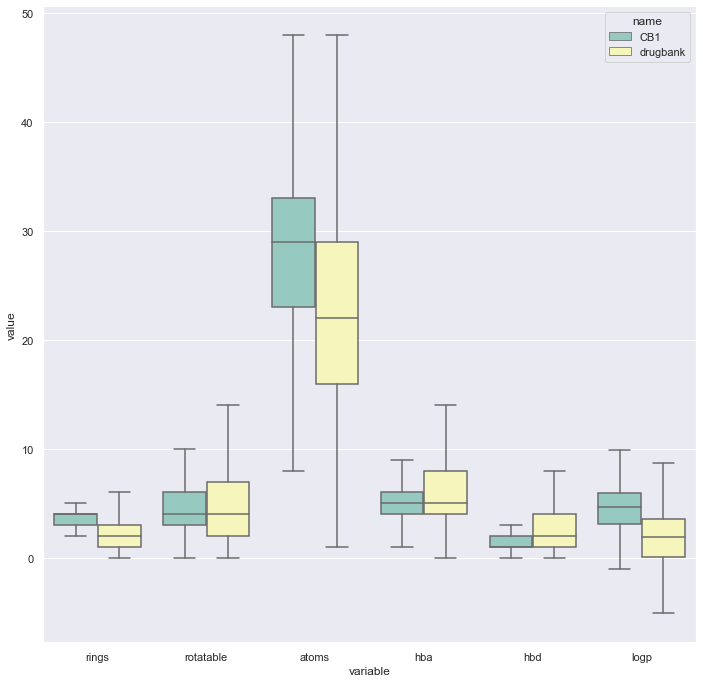

In [23]:
#Boxplot: comparison of CB1 ligand data and Drugbank data withou molecular weight and topological polar surface area
sns.set(rc={'figure.figsize':(11.7, 11.7)})
sns.boxplot(y='value', x='variable', 
                 data=df1, 
                 palette="Set3",
                 hue='name',
                 showfliers=False)

In [24]:
df2 = pd.melt(df_merge, id_vars=['name'], value_vars=['molwt', 'tpsa'])
df2

,name,variable,value
0,CB1,molwt,381.221641
1,CB1,molwt,584.065209
2,CB1,molwt,373.146013
3,CB1,molwt,528.146741
4,CB1,molwt,409.192090
...,...,...,...
20217,drugbank,tpsa,20.230000
20218,drugbank,tpsa,149.820000
20219,drugbank,tpsa,403.100000
20220,drugbank,tpsa,83.500000


<AxesSubplot:xlabel='variable', ylabel='value'>

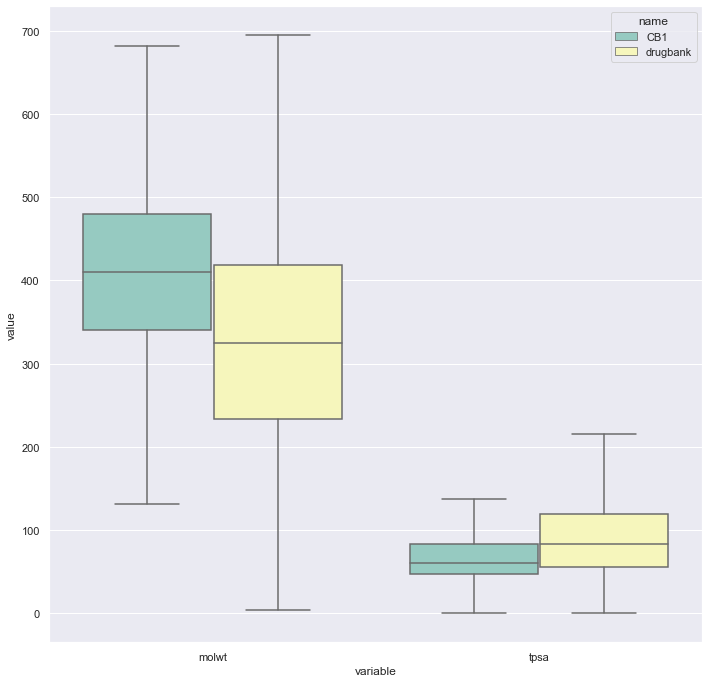

In [25]:
#Boxplot: comparison of CB1 ligand data and Drugbank data: mw and tpsa
sns.set(rc={'figure.figsize':(11.7, 11.7)})
sns.boxplot(y='value', x='variable', 
                 data=df2, 
                 palette="Set3",
                 hue='name',
                 showfliers=False)

It seems that CB1 ligands tend to have higher molecular weight, number of rings and number of heavy atoms than the substances in DrugBank. There is also a slight difference in octanol-water partition coefficient, where it's quite higher in our dataset than in the DrugBank. So, let's have a look on logP values. 
* Octanol-water partition coefficient (logP) represents the lipophilicity of a compound, and it is defined as the ratio of the concentration of a solute in a water-saturated octanolic phase to its concentration in an octanol-saturated aqueous phase.

In [26]:
#Data preparation for boxplot
df3 = pd.melt(df_merge, id_vars=['name'], value_vars=['logp'])
df3

,name,variable,value
0,CB1,logp,4.68810
1,CB1,logp,6.38318
2,CB1,logp,3.12534
3,CB1,logp,5.56834
4,CB1,logp,5.34650
...,...,...,...
10106,drugbank,logp,2.04560
10107,drugbank,logp,-1.32270
10108,drugbank,logp,1.54710
10109,drugbank,logp,-0.00030


<AxesSubplot:xlabel='variable', ylabel='value'>

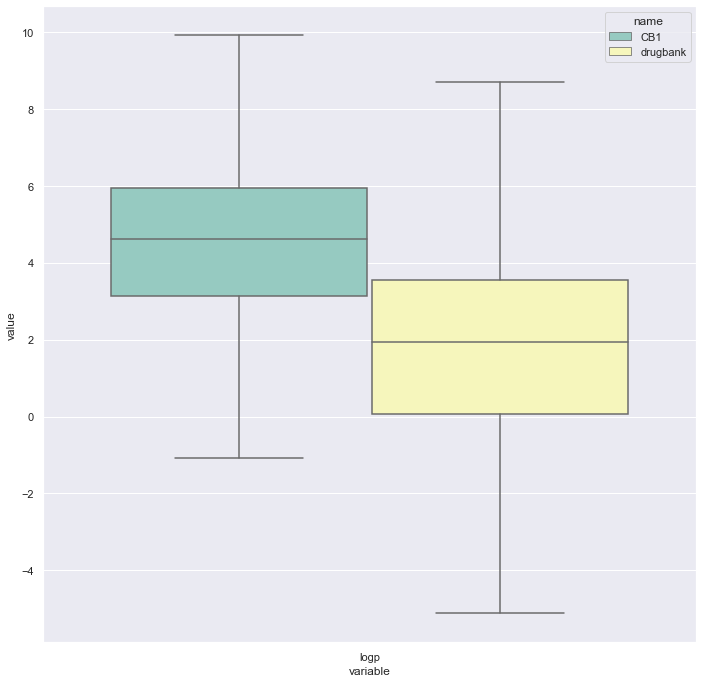

In [44]:
#Boxplot: comparison of logP values of CB1 ligand and DrugBank substances
sns.set(rc={'figure.figsize':(11.7, 11.7)})
sns.boxplot(y='value', x='variable', 
                 data=df3, 
                 palette="Set3",
                 hue='name',
                 showfliers=False)


<AxesSubplot:>

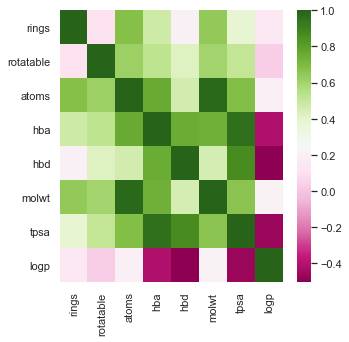

In [28]:
#Correlation CB1 ligands 
corr = df.corr()
dims = (5, 5)
fig, ax = plt.subplots(figsize = dims)
sns.heatmap(corr, cmap= "PiYG")

There is a slight correlation between logP and number of heavy atoms and molecular weight.

<AxesSubplot:>

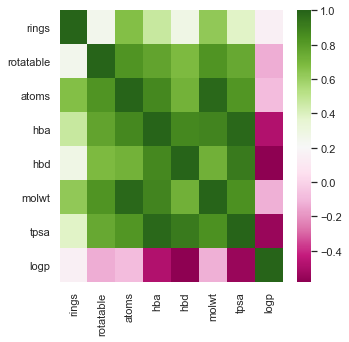

In [29]:
#Correlation Drugbank
corr = df_drugbank.corr()
dims = (5, 5)
fig, ax = plt.subplots(figsize = dims)
sns.heatmap(corr, cmap= "PiYG")

There is a slight correlation between logP and number of rings.

In [30]:
df.logp.describe()

count    2998.000000
mean        4.323888
std         2.388208
min       -17.132900
25%         3.121575
50%         4.621820
75%         5.938620
max        10.812700
Name: logp, dtype: float64

In [31]:
df_drugbank.logp.describe()

count    7113.000000
mean        1.607801
std         3.190621
min       -83.666800
25%         0.054300
50%         1.933000
75%         3.534620
max        24.570500
Name: logp, dtype: float64

So, as we can see from statistcs the mean of logP of my dataset is 4.32 and the DrugBank's is 1.6, which is quite a difference.

(-10.0, 10.0)

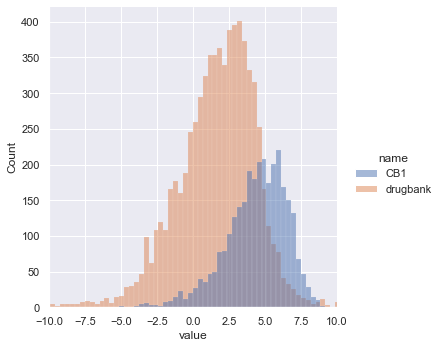

In [32]:
#Histogram of logP value of CB1 ligands and DrugBank
sns.displot(df3, x="value", hue ="name")
plt.xlim(-10, 10)

So, let's have a look on distribution of logP value in our dataset and DrugBank's substances. Lipinski's rule of five says that druglike substances  should have logP value in range of −0.4 to +5.6 and to be orally active it should not exceed 5. What's more, according to this paper, we can look at logP values and predict the suitability of drugs administration. https://www.acdlabs.com/download/app/physchem/making_sense.pdf
* The logP of a compound intended for oral administration should be < 5.
* A drug targeting the central nervous system (CNS) should ideally have a logP value around 2
* For oral and intestinal absorption the idea value is 1.35–1.8 
* Drug intended for sub-lingual absorption should have a logP value > 5

In [46]:
#The most suitable way of administration of CB1 ligands according to logP value
def count_range_in_list(li, min, max):
	ctr = 0
	for x in li:
		if min <= x <= max:
			ctr += 1
	return ctr
print(round(count_range_in_list(df["logp"], -0.4, 5.6)/len(df["logp"])*100,2), "% of substances are druglike accordning to Lipinski's rule of five")
print(round(count_range_in_list(df["logp"], -17.14, 5)/len(df["logp"])*100,2), "% of substances are suitable for oral administration")
print(round(count_range_in_list(df["logp"], 1.75, 2.25)/len(df["logp"])*100,2), "% of substances are suitable for tageting CNS")
print(round(count_range_in_list(df["logp"], 1.35, 1.8)/len(df["logp"])*100,2), "% of substances are suitable for oral an intestinal absorption")
print(round(count_range_in_list(df["logp"], 5,10.9 )/len(df["logp"])*100,2), "% of substances are suitable for sub-lingual absorption")


63.71 % of substances are druglike accordning to Lipinski's rule of five
56.37 % of substances are suitable for oral administration
3.8 % of substances are suitable for tageting CNS
2.57 % of substances are suitable for oral an intestinal absorption
43.63 % of substances are suitable for sub-lingual absorption


In [45]:
#The most suitable way of administration of Drugbanks' substances according to logP value
def count_range_in_list(li, min, max):
	ctr = 0
	for x in li:
		if min <= x <= max:
			ctr += 1
	return ctr
print(round(count_range_in_list(df_drugbank["logp"], -0.4, 5.6)/len(df_drugbank["logp"])*100,2),  "% of substances are druglike accordning to Lipinski's rule of five")
print(round(count_range_in_list(df_drugbank["logp"], -84, 5)/len(df_drugbank["logp"])*100,2), "% of substances are suitable for oral administration")
print(round(count_range_in_list(df_drugbank["logp"], 1.75, 2.25)/len(df_drugbank["logp"])*100,2), "% of substances are suitable for tageting CNS")
print(round(count_range_in_list(df_drugbank["logp"], 1.35, 1.8)/len(df_drugbank["logp"])*100,2), "% of substances are suitable for oral an intestinal absorption")
print(round(count_range_in_list(df_drugbank["logp"], 5,25 )/len(df_drugbank["logp"])*100,2), "% of substances are suitable for sub-lingual absorption")


75.06 % of substances are druglike accordning to Lipinski's rule of five
92.49 % of substances are suitable for oral administration
7.32 % of substances are suitable for tageting CNS
6.55 % of substances are suitable for oral an intestinal absorption
7.51 % of substances are suitable for sub-lingual absorption


I looked at logP values of my dataset and Drugbanks' substances to compare their "druglikeness" and to predict the most suitable way of administration. 63.71% of CB1 ligands and  75.06% of DrugBanks's pharmaceuticals are druglike accordning to Lipinski's rule of five. In my dataset the most suitable way of administration is oral administration and sub-lingual. In Drugbank's dataset it's mainly oral administration. The biggest difference was in sub-lingual absorption, where in my dataset 43.6 % of drugs are suitable for sub-lingual absorption and in DrugBank it was only 7.51 %. This was caused due to the slightly higher logP values in my dataset, which we see from the distribution of logP values in histogram and from statistics.  To sum up, CB1 ligand tend to be more lipophilic compared to registered pharmaceuticals in DrugBank.